# <div class='alert alert-success'> Text Classification </div>

**Here we will be using Supervised Machine Learning**<br><br>
**Basically supervised learning is when we teach or train the machine using data that is well labelled. Which means some data is already tagged with the correct answer. After that, the machine is provided with a new set of examples(data) so that the supervised learning algorithm analyses the training data(set of training examples) and produces a correct outcome from labelled data.**

**<font color='purple'> Let us go through some breif definitions first</font>**

<font color='blue'> **Accuracy**</font>:<br>
Classification accuracy is the accuracy we generally mean, Whenever we use the term accuracy. We calculate this by calculating the ratio of correct predictions by a total number of input Samples.


Accuracy = No. of correct predictions / Total number of input samples.    

<font color='blue'>**Recall**</font>:<br>
Recall is defined as ratio of the number of retrieved and relevant documents(the number of items retrieved that are relevant to the user and match his needs) to the number of possible relevant documents(number of relevant documents in the database)

<font color='blue'>**Precision**</font><br>
Precision measures one aspect of information retrieval overhead for a user associated with a particular search. If a search has 85 percent precision then, then 15(100-85) percent of user effort is overhead reviewing non-relevant items.



<font color='blue'>**F1 Score**</font><br>
The F-score or F-measure is a measure of a test’s accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive.



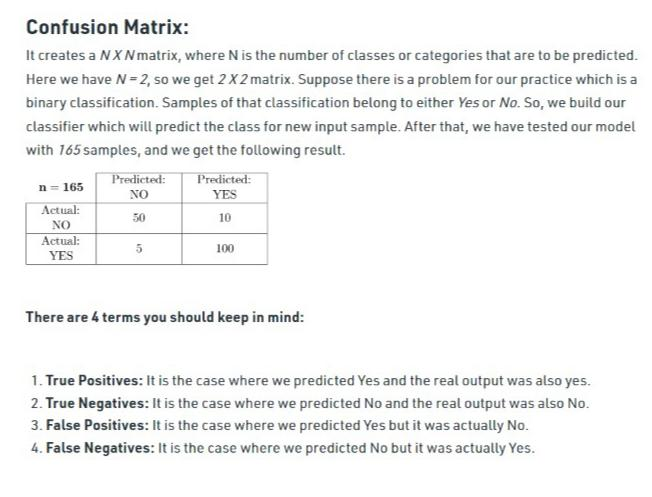

**Accuracy** <br>     = TP+TN/total<br><br>
**Error Rate** <br>   = FP+FN/total<br><br>
**Precision**<br>     = TP/TP+FP<br><br>
**Recall**<br>        = TP/TP+FN<br><br>
**F1 score**<br>      = (2*precision*recall) / (precision+recall)

## <div class='alert alert-info'> Feature Extraction </div>

## Building a Natural Language Processor from scratch

### Lets start with some documents

We have 2 documents 1.txt and 2.txt<br>

### Building a Vocabulary

**We are going to check which word is present in the files and give them indexes by our own**

In [1]:
%%writefile 1.txt
I like to play cricket
But today its raining 
So I wont play

Overwriting 1.txt


In [2]:
%%writefile 2.txt
I dont like to play football
But today is a nice day
So I will play

Overwriting 2.txt


In [3]:
v={}
i=1
with open('1.txt') as f:
    x=f.read().lower().split()
for word in x:
    if word in v:
        continue #This will check if a word is coming twice then it won't give the index again
    else:
        v[word]=i
        i+=1
print(v)

{'i': 1, 'like': 2, 'to': 3, 'play': 4, 'cricket': 5, 'but': 6, 'today': 7, 'its': 8, 'raining': 9, 'so': 10, 'wont': 11}


In [4]:
with open('2.txt') as f:
    x=f.read().lower().split()
for word in x:
    if word in v:
        continue #This will check if a word is coming twice then it won't give the index again
    else:
        v[word]=i
        i+=1
print(v)

{'i': 1, 'like': 2, 'to': 3, 'play': 4, 'cricket': 5, 'but': 6, 'today': 7, 'its': 8, 'raining': 9, 'so': 10, 'wont': 11, 'dont': 12, 'football': 13, 'is': 14, 'a': 15, 'nice': 16, 'day': 17, 'will': 18}


**We can see <font color='blue'>like</font> in the first text has been given index 2 and in the second text has been given 2 as well.**

It indicates every text has been unique indexes

**Since we have performed encapsulation lets do Feature Extraction**

## Feature Extraction

In [5]:
a=['1.txt']+[0]*len(v)
#This is an empty vector

In [6]:
a

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
#we are gonna map the frequencies of the word in 1.txt file
with open('1.txt') as f:
    x=f.read().lower().split()
for word in x:
    a[v[word]]+=1

In [8]:
a

['1.txt', 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

**INFERENCE**

The ones written as 2 are the words present twice in 1.txt<br>
The ones written as 1 are present once in 1.txt<br>
The ones written as 0 are the ones which are not present in 1.txt but are present in 2.txt

In [9]:
b=['2.txt']+[0]*len(v)
#This is an empty vector

In [10]:
#we are gonna map the frequencies of the word in 1.txt file
with open('2.txt') as f:
    x=f.read().lower().split()
for word in x:
    b[v[word]]+=1

In [11]:
b

['2.txt', 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]

**Same Inference we can make for 2.txt as that we made for 1.txt**

#  <div class='alert alert-success'><font color='black'>Lets start with the Text Classification using scikit learn</font></div>

In [12]:
import numpy as np
import pandas as pd

In [13]:
df=pd.read_csv('HS.csv')

In [14]:
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### **<font color='blue'>Lets understand what we are about to do</font>**

We are going to train the data with all the sms values and try to predict if the message is ham or spam

**For doing any machine related work first we should if the data contains any null value**

In [15]:
df.isnull().sum()

Class    0
sms      0
dtype: int64

**So we do not need to preprocess it**

In [16]:
df['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

We have 4825 ham data and 747 spam data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x=df['sms']

In [19]:
y=df['Class']

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

## We will use the Count Vectoriser now

Text Preprocessing, Tokenising, and filtering Stop Words are done by the Count Vectoriser

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv=CountVectorizer()

In [23]:
p=cv.fit_transform(xtrain)  #When we fit we are building vocab, counting words etc

In [24]:
p

<4457x7780 sparse matrix of type '<class 'numpy.int64'>'
	with 59478 stored elements in Compressed Sparse Row format>

**We cannot view this as it is a huge sparse matrix**

In [25]:
p.shape

(4457, 7780)

Across 4457 messages there were 7714 unique words

This also shows that our training set is comprised of 4457 documents, and 7773 features.

# Lets use TfidTransformer

We are using TfidTransformer to transform the counts we got in variable <font color='red'> **p** </font> to frequencies<br>
With the help of TfidTransfomer the words which are more important are also given more weight<br>
Lets get started<br><br>

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
tt = TfidfTransformer()

xtrain_tfidf =tt.fit_transform(p)
xtrain_tfidf.shape

(4457, 7780)

<font color='blue'>The shape is same but this time its not only the count but we have taken the term frequencies and multiplied <br>
it with inverse document frequency

The fit_transform() method actually performs two operations: it fits an estimator to the data and then transforms our count-matrix to a tf-idf representation.

## `Since its common to perform Count Vectorisation followed up by TfidTransformer scikit learn has TdfidVectoriser which does the same in 1 go instead of 2 steps`

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

xtrain_tfidf = vectorizer.fit_transform(xtrain) # We are directly using x train
xtrain_tfidf.shape

(4457, 7780)

**So we get the same shape and output and it has been done in a single step**

## Now we will be using Linear Support Vector Classifier

In [28]:
from sklearn.svm import LinearSVC

In [29]:
clf=LinearSVC()

In [30]:
clf.fit(xtrain_tfidf,ytrain)

LinearSVC()

**`Note:`** Only our training data set has been vectorised to a full vocabulary<br><br>
In order to perform our analysis on our test set we would need to perform all the steps again<br>

**<font color='green'> Scikit learn provides a compound classifier which performs both vectorisation and classification <br>
    So for this now we will be using `Pipeline`**</font>

In [31]:
from sklearn.pipeline import Pipeline as pp

**Now we will create an object and pass a list of tuples**

The first parameter will be a string what we want to call the  method and the second will will be what we want to apply

In [32]:
text=pp([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

So this pipeline object behaves just like a classifier or a machine learning algorithm

**Now we can do the same basic steps**

In [33]:
text.fit(xtrain,ytrain)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

**Finally lets do some prediction**

In [34]:
prediction=text.predict(xtest)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error

In [36]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       972
        spam       0.98      0.95      0.96       143

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [37]:
print(confusion_matrix(ytest,prediction))

[[969   3]
 [  7 136]]


In [38]:
print(accuracy_score(ytest,prediction))

0.9910313901345291


**<font color='green'>WOW!!  99% accuracy</font>**